In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBClassifier

from data_prep import y_train, y_test, tf_idf_data_train, tf_idf_data_test
from visualizations import confusion_matrix_heat_map

/Users/stevedye/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/stevedye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [2]:
parameters = {'max_depth': [7],
              'min_child_weight': [0.5]}

In [3]:
XGBC = XGBClassifier()
xgb_classifier = GridSearchCV(XGBC, parameters, cv=3, n_jobs= -1)
xgb_classifier.fit(tf_idf_data_train, y_train)
print(xgb_classifier.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=0.5, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)


In [4]:
xgb_train_preds = xgb_classifier.predict(tf_idf_data_train)
xgb_test_preds = xgb_classifier.predict(tf_idf_data_test)

xgb_train_score = accuracy_score(y_train, xgb_train_preds)
xgb_test_score = accuracy_score(y_test, xgb_test_preds)

xgb_cv_score = cross_val_score(xgb_classifier, tf_idf_data_train, y_train, cv=3, scoring="accuracy")

In [5]:
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(xgb_train_score, xgb_test_score))
print("CV Scores:", xgb_cv_score)

Training Accuracy: 0.7016 		 Testing Accuracy: 0.5968
CV Scores: [0.55286738 0.58766428 0.68996416]


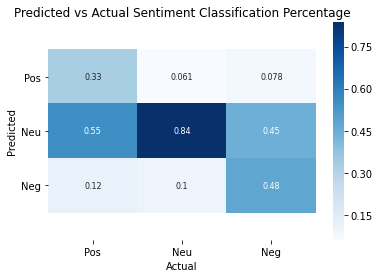

In [7]:
confusion_matrix_heat_map(xgb_classifier, tf_idf_data_test, y_test)